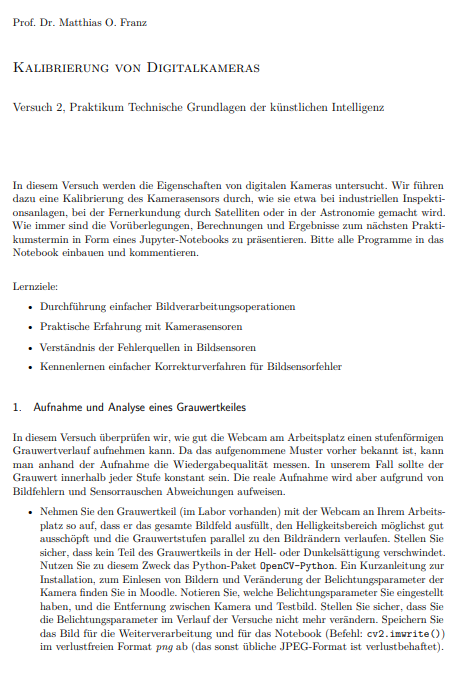


Zu Finden In: greyscale.png (Ist bereits ein Graubild):

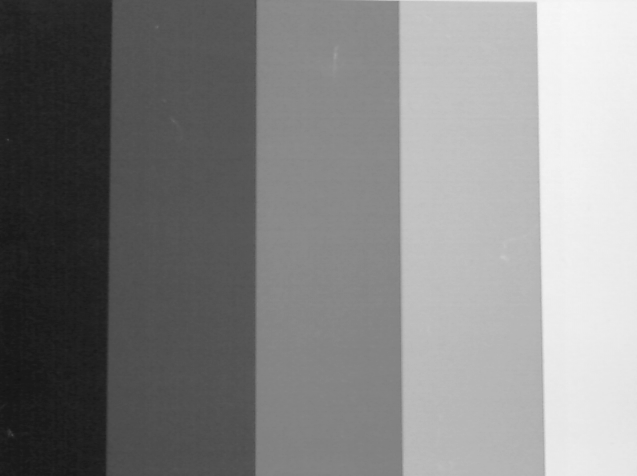

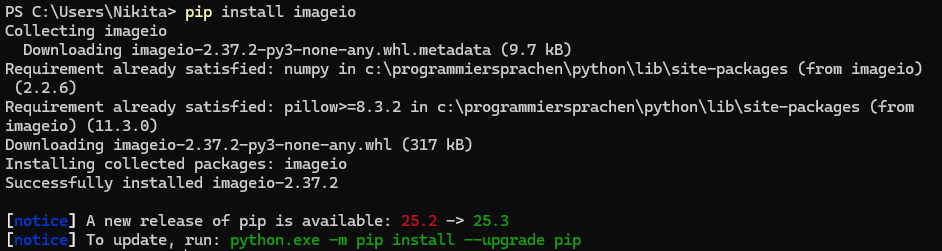

In [1663]:
import sys
print(sys.executable)

c:\IDE\Anaconda\python.exe


In [1664]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v3 as iio
import cv2

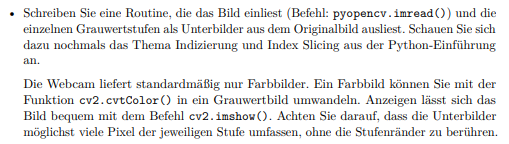

In [1665]:
def grayscaleZerstückeln(img):
    ausschnittBoundsArr=[
        (100, 400, 0, 100),
        (100, 400, 120, 250),
        (100, 400, 260, 390),
        (100, 400, 410, 530),
        (100, 400, 550, 620)
    ]
    ausschnittBildArr = []
    for bounds in ausschnittBoundsArr:   
        ausschnitt= img[bounds[0]:bounds[1],bounds[2]:bounds[3]]
        #if(ausschnitt.max != 0):
            #ausschnittBildArr.append(ausschnitt/ausschnitt.max())
        #else:
        ausschnittBildArr.append(ausschnitt)
    return ausschnittBildArr

In [1666]:
def einBildEinlesen(dateiname, Farbe = 0, keinUrBild =0, asSubplot = 1, keinTeilBild = 0, garnichtTeilen=0):
    img = iio.imread(dateiname)
    img = img.astype('float64')
    # Nur umwandeln, wenn Bild tatsächlich 3 Kanäle hat (Farbbild ist)
    if img.ndim == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        img = img
    if(Farbe== 1 and  keinUrBild ==0):
        plt.figure()
        #print("Eingelesenes Bild:\n ",img)
        plt.title(f"{dateiname} als Farbbild")
        plt.imshow(img/255) #255 = Maxwert in 8 Bit Bildern scaliert Farben
        #plt.imshow(img/img.max()) #/Maximaler Grauwert scaliert Farben
        
    elif(keinUrBild ==0):
        plt.figure()
        #print("Eingelesenes Bild:\n ",img)
        plt.title(f"{dateiname} als Graubild")
        #plt.imshow(img/255) #255 = Maxwert in 8 Bit Bildern scaliert Farben
        #plt.imshow(img/img.max()) #/Maximaler Grauwert scaliert Farben
        plt.imshow(img, cmap='gray')
        
    if("scale" in dateiname  and garnichtTeilen==0):
        ausschnittBildArr = grayscaleZerstückeln(img)
    
        if(asSubplot==1 and keinTeilBild == 0):
            fig, axes = plt.subplots(nrows=1, ncols=len(ausschnittBildArr),  figsize=(15, 5))
            #fig → die gesamte Figure (das komplette Bild)
            #axes → die einzelnen Zeichenbereiche (Plot-Felder), also Unterplots
            
            for colums,ausschnittBild in zip(axes,ausschnittBildArr):
                colums.imshow(ausschnittBild,cmap='gray')
                #colums.axis('off')
            fig.suptitle(f"{dateiname} als Graubild nach Graustufe aufgeteilt", fontsize=14)
            plt.show()
            return ausschnittBildArr
            
        elif(keinTeilBild == 0): 
            i=0
            for ausschnittBild in ausschnittBildArr:
                i=i+1
                plt.figure()
                plt.imshow(ausschnittBild,cmap='gray')
                plt.title(f"{dateiname} als Graubild Teil{i}")
        return ausschnittBildArr
    img = np.array(img)
    return img          

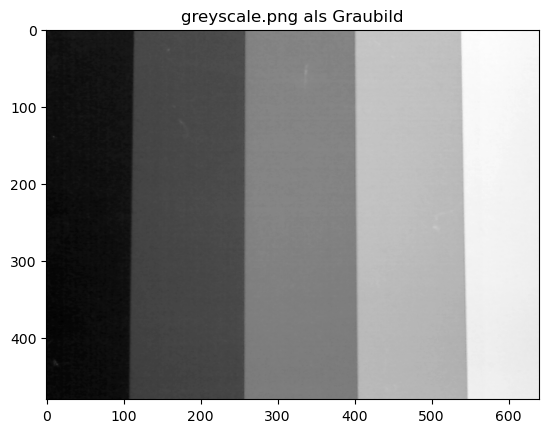

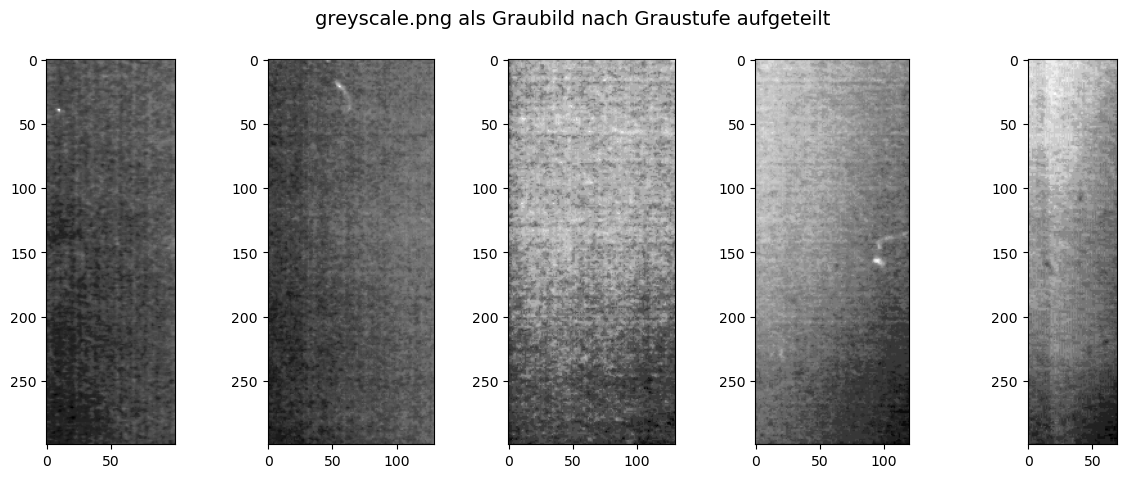

In [1667]:
ausschnittBildArr = einBildEinlesen(r"greyscale.png",Farbe =0,keinUrBild=0,asSubplot=1,keinTeilBild = 0)

____Plott____

In [1668]:
def plottstart():
     plt.figure(figsize=(8,4))           #neuer Plott
     
def plottend(ueberschrift, xlabel, ylabel):
     # doppelte label vermeiden------------------------------------------
     # plt.getCurentAxes()
     #   Gibt die aktuelle Achse (das aktuelle Diagramm) zurück, auf der man zeichnet
     #   Rückgabe Objekt vom Typ matplotlib.axes._axes.Axes
     # .get_legend_handles_labels() liefert zwei Listen zurück: handles, labels
     handles, labels = plt.gca().get_legend_handles_labels()
     # zip(labels, handles) verbindet beide Listen paarweise: 
     #   [("Messpunkte", obj1), ("Messpunkte", obj2), ("Kennlinie", obj3)]
     # durch dict() wird das zu einem Dictionary umgewandelt: 
     #   doppelte Schlüssel („Messpunkte“) werden automatisch überschrieben,
     #   es bleibt nur ein Eintrag pro Label übrig
     by_label = dict(zip(labels, handles))
     # plt.legend(by_label.values(), by_label.keys()) Zeigt jetzt die Legende ohne doppelte Einträge an
     #.values = Plot-Objekte
     #.keys = Textbeschriftung
     plt.legend(by_label.values(), by_label.keys())
     #---------------------------------------------------------------
     plt.title(f"{ueberschrift}")
     #Achsenbeschriftung
     plt.xlabel(f"{xlabel}")
     plt.ylabel(f"{ylabel}")
     plt.grid(True)
     plt.legend(loc='upper right')   #legende oben rechts
     #plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
     #dass alles schön sichtbar bleibt
     plt.tight_layout()
     plt.show()

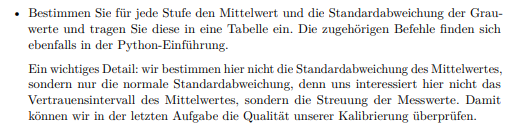

In [1669]:
def plottMittStd(pixelMeanArr, pixelStdArr, erhaltenesPixelArr, sortet =0):
    farbArr=["orange", "pink", "purple", "blue", "cyan"]
    if(sortet==1):
        ausschnittPixelArr =erhaltenesPixelArr
        for ausschnitt in range(len(ausschnittPixelArr)):
            plottstart()
            plt.hist(ausschnittPixelArr[ausschnitt], bins=50, color=farbArr[ausschnitt], edgecolor="black")
            plt.axvline(pixelMeanArr[ausschnitt], color="red", linestyle="--", label=f"Mean: pixelMeanArr[ausschnitt]")
            plt.axvline(pixelStdArr[ausschnitt], color="black", linestyle="-", label=f"Std: {pixelStdArr[ausschnitt]:.3f}")
            plt.axvline(pixelMeanArr[ausschnitt]+pixelStdArr[ausschnitt], color="green", linestyle="--", label=f"Mean + Std: {pixelMeanArr[ausschnitt]+pixelStdArr[ausschnitt]:.3f}")
            plt.axvline(pixelMeanArr[ausschnitt]-pixelStdArr[ausschnitt], color="green", linestyle="--", label=f"Mean - Std: {pixelMeanArr[ausschnitt]-pixelStdArr[ausschnitt]:.3f}")
            plottend(f"Helligkeitsverteilung im Ausschnitt {ausschnitt}", "Helligkeit (0-1)","Anzahl Pixel")
    else:
        unsortedPixelArr= erhaltenesPixelArr 
        mean = pixelMeanArr
        std = pixelStdArr
        plottstart()
        plt.hist(unsortedPixelArr, bins=100, color=farbArr[0], edgecolor="black")
        
        plt.axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.3f}")
        plt.axvline(std, color="black", linestyle="-", label=f"Std: {std:.3f}")
        plt.axvline(mean+std, color="green", linestyle="--", label=f"Mean + Std: {mean+std:.3f}")
        plt.axvline(mean-std, color="green", linestyle="--", label=f"Mean - Std: {mean-std:.3f}")
        plottend(f"Helligkeitsverteilung Gesamtstreuung", "Helligkeit (0-250)","Anzahl Pixel")
      
      

In [1670]:

def proStufeMittStd(ausschnittBildArr ,plotEachAusschnitt=0, plotGesamtStreuung =0):
    
    pixelMeanArray = []
    pixelStdArray = []
    ausschnittPixelArr = []     #helligkeiten der Pixel
    unsortedPixelArr=[]         #helligkeiten der Pixel
    for ausschnittNr in range(len(ausschnittBildArr)):
        # Pixel-Liste pro Ausschnitt anlegen
        ausschnittPixelArr.append([])
        # Pixelwerte sammeln
        abschnitt = np.array(ausschnittBildArr[ausschnittNr])
        for zeile in range(len(abschnitt)):
            zeilArr = np.array(abschnitt[zeile])
            for spalte in range(len(zeilArr)):
                ausschnittPixelArr[ausschnittNr].append(zeilArr[spalte])
                unsortedPixelArr.append(zeilArr[spalte])
        #MEAN pro pixel   
        pixelMeanArray.append(np.mean(ausschnittPixelArr[ausschnittNr]))
        #STD pro pixel
        pixelStdArray.append(np.std(ausschnittPixelArr[ausschnittNr], ddof=1))      
    
    gesamtMean = np.mean(unsortedPixelArr)
    gesamtStd = np.std(unsortedPixelArr,ddof=1)  
          
    if(plotEachAusschnitt == 1):
        plottMittStd(pixelMeanArray, pixelStdArray, ausschnittPixelArr, sortet=1)
    if(plotGesamtStreuung == 1):       
        plottMittStd(gesamtMean, gesamtStd, unsortedPixelArr, sortet=0)
        
    return gesamtMean, gesamtStd, pixelMeanArray, pixelStdArray, ausschnittPixelArr
             

In [1671]:

def tabelleGraustufen(pixelMeanArr, pixelStdArr, save_csv=False, csv_name="tabelle.csv"):
    

    farb_text = ["schwarz","dunkelgrau","grau", "hellgrau","weiss"]
       
    anzahl = len(pixelMeanArr)

    tabelle = pd.DataFrame({
        "Grauwert-Stufe": farb_text,
        "Mittelwert": np.round(pixelMeanArr, 3),
        "Standardabweichung": np.round(pixelStdArr, 3)
    })

    print("\n===================== Tabelle Graustufen =====================")
    print(tabelle.to_string(index=False))
    print("=============================================================\n")

    if save_csv:
        tabelle.to_csv(csv_name, index=False)
        print(f">>> Tabelle gespeichert als: {csv_name}")

    return tabelle

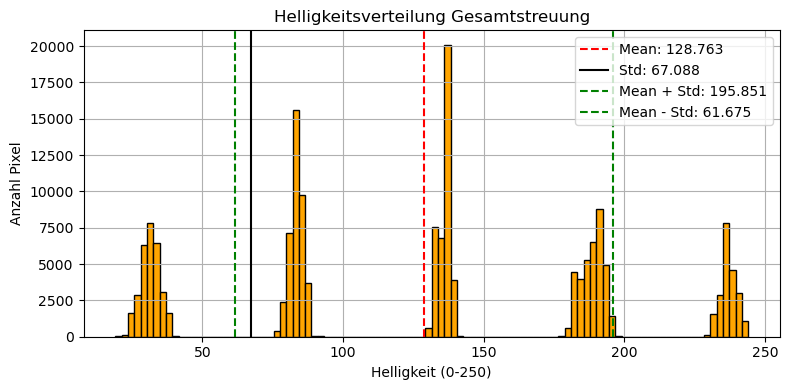


===================== Tabelle Graustufen =====================
Grauwert-Stufe  Mittelwert  Standardabweichung
       schwarz      31.316               3.353
    dunkelgrau      83.263               2.493
          grau     135.957               2.298
      hellgrau     188.413               3.968
         weiss     236.856               2.906

>>> Tabelle gespeichert als: graustufenTabelle_A1.csv


In [1672]:
ausschnittBildArr = einBildEinlesen(r"greyscale.png",Farbe =0,keinUrBild=1,asSubplot=1,keinTeilBild = 1)
gesamtMean, gesamtStd,pixelMeanArray, pixelStdArray,erhaltenesPixelArr = proStufeMittStd(ausschnittBildArr, plotEachAusschnitt =0, plotGesamtStreuung= 1)
tabelle = tabelleGraustufen(pixelMeanArray, pixelStdArray,save_csv=True, csv_name="graustufenTabelle_A1.csv")

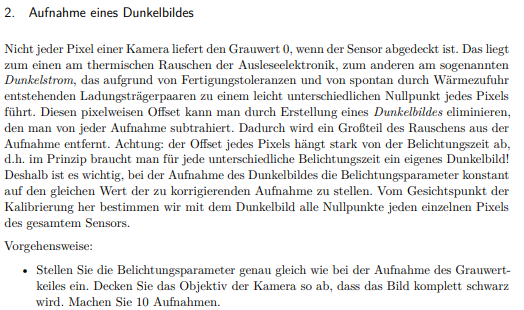

black_Nummer.png Dateien Nummer 0<1<11

In [1673]:
def schwarzweißDateiname( nummer, hell = 0):
    if hell == 0:
        farbe = "black"
    if hell == 1:
        farbe = "white"
    if(0 < nummer and nummer < 11):
        Nummer = nummer
        return f"{farbe}_{Nummer}.png"
    else: 
        print("Nummer gibts net")
        return "Nummer gibts net"

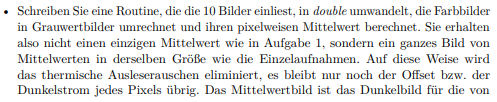

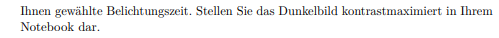

In [1674]:
def kontrast_maximieren(img):
    min_val = np.min(img)
    max_val = np.max(img)
    
    print("----kontrast_maximieren----")
    print("bild: min =", min_val)
    print("bild: max =", max_val)
    print("bild: mean =", np.mean(img))
    print("img = (img - min_val) / (max_val - min_val)")
    print("---------------------------")
    
    if(max_val!= min_val):
        return (img - min_val) / (max_val - min_val)
    else: 
        return img

In [1675]:
def zehnKontrastBilder(showPicture=0,controllausgabe=0, hell = 0):
    zehnImg=[]
    #Werte holen
    for i in range (0, 10):
        dateiname = schwarzweißDateiname(i+1, hell=hell)
        img = einBildEinlesen(dateiname, keinUrBild =1)
        img = np.array(img, dtype=np.float64)
        zehnImg.append(img)
    #pixelweiser Mittelwert
    imgMean =[]
    zehnPixelArr = np.empty(10)
    for zeile in range(len(zehnImg[0])):
        imgMean.append([])
        for spalte in range(len(zehnImg[0][0])):
            imgMean[zeile].append([])
            for i in range (0, 10):
                zehnPixelArr[i] = zehnImg[i][zeile][spalte]          
            imgMean[zeile][spalte]= np.mean(zehnPixelArr)  
    
    if(controllausgabe==1):
        for zeile in range(len(zehnImg[0])): 
            print("[",", ".join(f"{wert:.3f}" for wert in imgMean[zeile]), end="") 
            print("]") 
    
    
    if(showPicture==1):
        imag=kontrast_maximieren(imgMean)
        imag = np.array(imag)
        plt.imshow(imag, cmap='gray')
    
    if(hell == 0):
        contrast = "black"
    else:
        contrast = "white"
    
    imgMean = np.array(imgMean)    
    dateiname=f"{contrast}_MittelwertBild.png"
    cv2.imwrite(dateiname, imgMean.astype(np.uint8))
    return imgMean, dateiname

----kontrast_maximieren----
bild: min = 0.0
bild: max = 0.0
bild: mean = 0.0
img = (img - min_val) / (max_val - min_val)
---------------------------


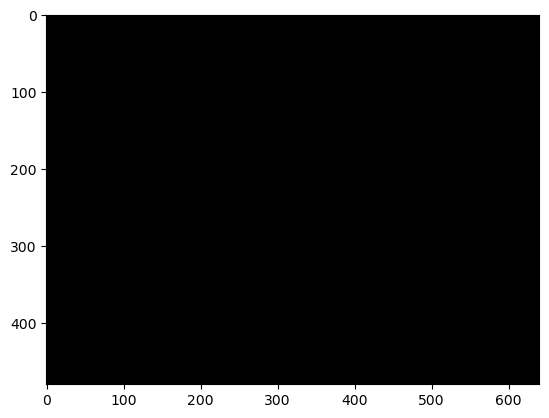

In [1676]:
kontrastbild = zehnKontrastBilder(showPicture=1, hell=0)

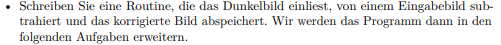

In [1677]:
def bildKorrigieren(dateiname, mitHell = 0, weißbild=0, zusatz = ""):
    eingabeImg=einBildEinlesen(dateiname=dateiname,keinUrBild=1, keinTeilBild=1,garnichtTeilen=1)
    eingabeImg = np.array(eingabeImg, dtype=np.float64)
    
    if(mitHell == 0):
        kontrastbild, dateinamekon = zehnKontrastBilder(showPicture=0,hell=mitHell)
        kontrastbild = np.array(kontrastbild, dtype=np.float64)
    elif weißbild is not None:
        kontrastbild = np.array(weißbild, dtype=np.float64)
    else: 
        print("kein Bild übergeben")
    #print("ein",eingabeImg.shape)
    #print("dunkel",kontrastbild.shape)
    ausgabeImg=eingabeImg-kontrastbild
    
    clean = dateiname.replace(".png","")
    dateibezeichnung = f"KorrekturNorm_{clean}{zusatz}.png"
    cv2.imwrite(dateibezeichnung, ausgabeImg.astype(np.uint8))
    return ausgabeImg, dateibezeichnung

In [1678]:
ausgabeImg, dateibezeichnung= bildKorrigieren("greyscale.png", mitHell=0)

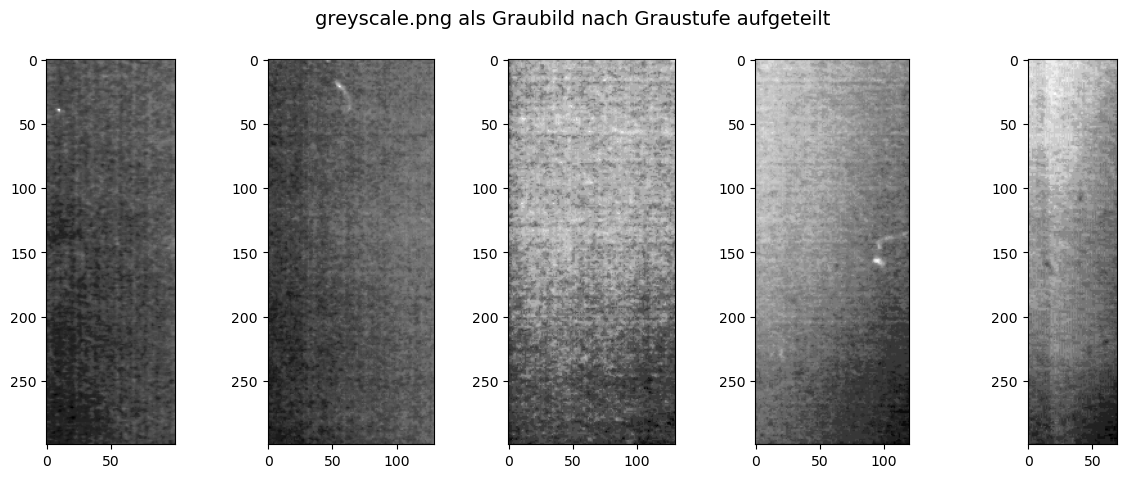

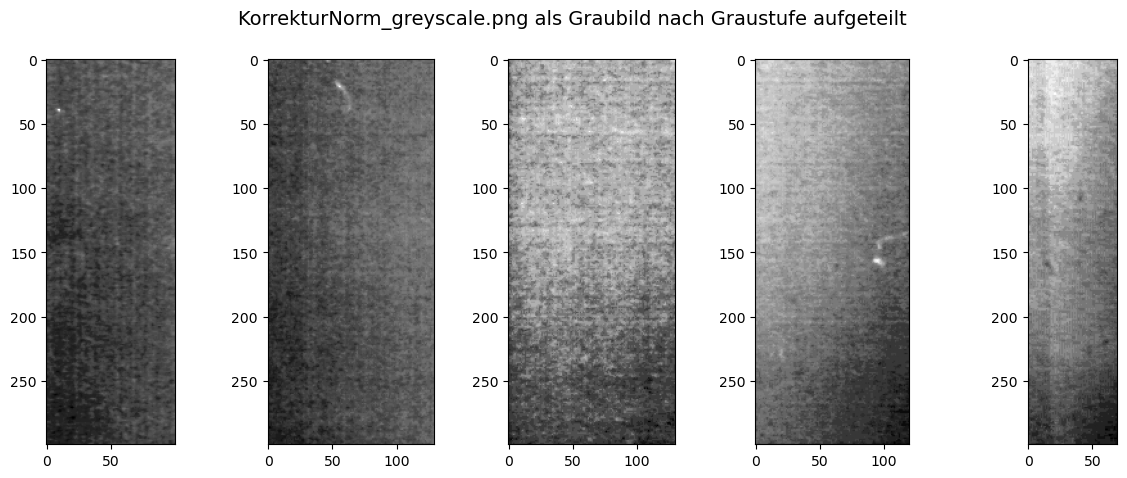

In [1679]:
eingabeImg=einBildEinlesen(dateiname="greyscale.png", Farbe=0, keinUrBild=1)
eingabeImg=einBildEinlesen(dateiname="KorrekturNorm_greyscale.png", Farbe=0, keinUrBild=1)

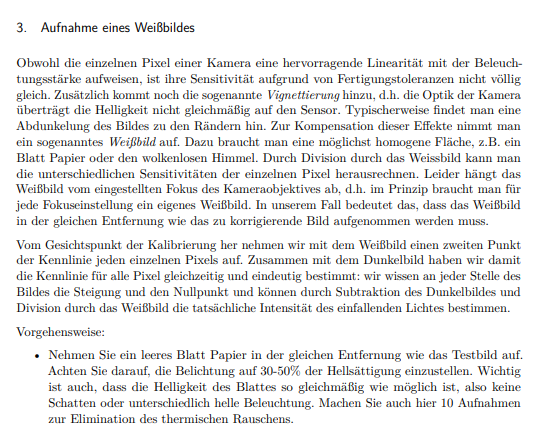

black_Nummer.png Dateien Nummer 0<1<11


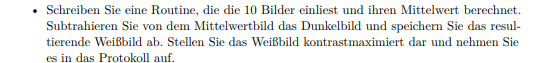

In [1680]:
def weißSubSchwarz(showPicture=0):
    hellBild, dateiname= zehnKontrastBilder(showPicture=0,hell=1)
    hellBild = np.array(hellBild)
    
    resWeißbild, dateibezeichnung = bildKorrigieren(dateiname=dateiname, mitHell = 0)

    if(showPicture==1):
        resWeißbildK = kontrast_maximieren(resWeißbild)
        plt.imshow(resWeißbildK, cmap='gray')
    
    return resWeißbild       
    

----kontrast_maximieren----
bild: min = 229.0
bild: max = 250.0
bild: mean = 245.594365234375
img = (img - min_val) / (max_val - min_val)
---------------------------


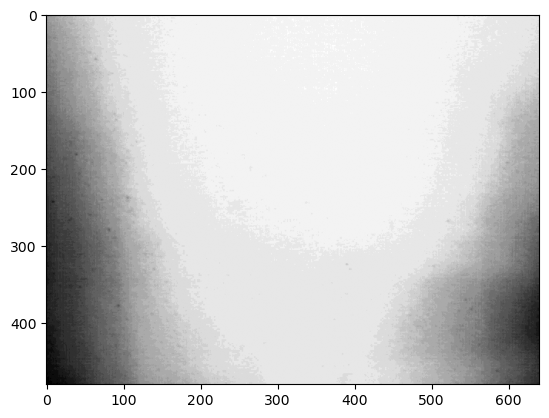

In [1681]:
result = weißSubSchwarz(1)

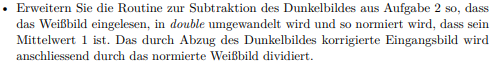

In [1682]:

def normierBild(bild):
    bild = np.array(bild, dtype=np.float64)
    mean_value = np.mean(bild)
    print(mean_value)
    if mean_value==0:
        print("WARNUNG: Mittelwert ≈ 0 → Normierung übersprungen!")
        return bild
    bild = bild / mean_value
    
    dateiname=f"NormiertesBild.png"
    cv2.imwrite(dateiname, bild.astype(np.uint8))
    return bild, dateiname


In [1683]:
def weißSubSchwarzNormiert(showPicture=0):
    # Weißbild einlesen (hell=1)
    hellBild, dateiname = zehnKontrastBilder(showPicture=0, hell=1)
    hellBild = np.array(hellBild, dtype=np.float64)
    
    # Weißbild normieren (MEAN = 1)
    weiss_norm, dateinameN = normierBild(hellBild)
    

    # Eingang korrigieren (inkl. Dunkelbild-Abzug)
    korrBild, dateibezeichnung = bildKorrigieren(dateiname=dateinameN, mitHell=0)
    korrBild = np.array(korrBild, dtype=np.float64)

    
    result = korrBild / weiss_norm


    if showPicture == 1:
        plt.imshow(result, cmap='gray')
        plt.title("Normiertes korrigiertes Bild (Division durch normiertes Weißbild)")

    return result


245.91652083333338


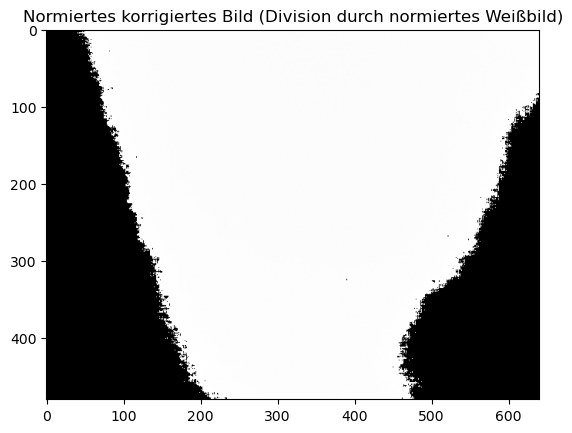

In [1684]:
result = weißSubSchwarzNormiert(1)

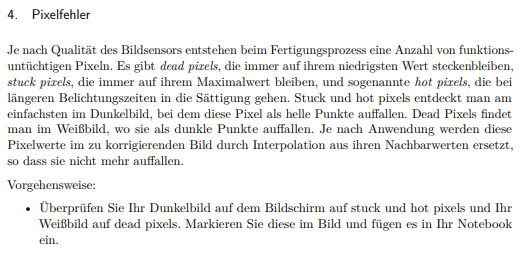

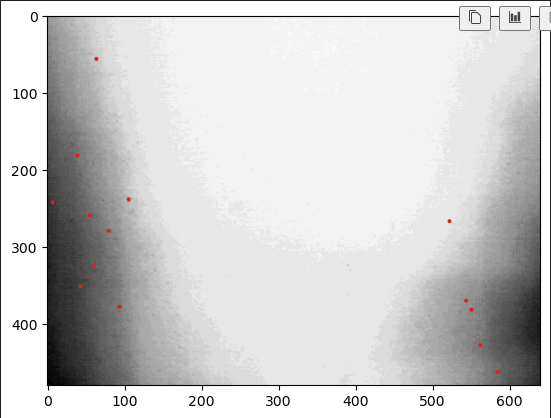

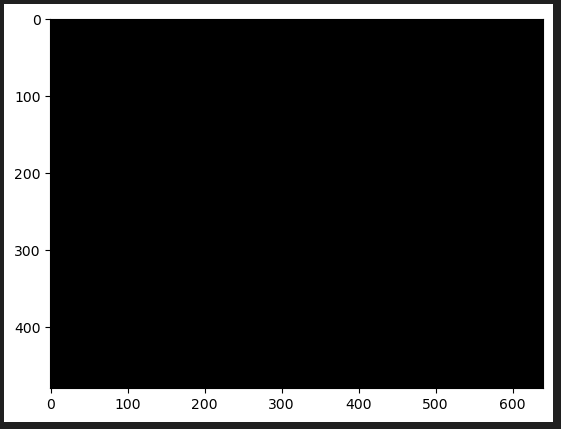

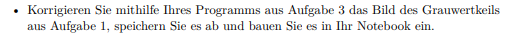

In [1685]:
def korrigierGrayscale(original = 0):
    dateiname = "greyscale.png"
    normWeißBild = weißSubSchwarzNormiert(0)
    bildNachSchwarz,dateibezeichnung = bildKorrigieren(dateiname=dateiname, mitHell = 0, zusatz="bildNachSchwarz")
    result,dateibezeichnung = bildKorrigieren(dateiname=dateibezeichnung, mitHell = 1,weißbild= normWeißBild,zusatz="bildNachSchwarzundWeiss")
    
    if(original==1):
        plottstart()
        bild = einBildEinlesen(dateiname=dateiname)
        
    
    plottstart()
    result = einBildEinlesen(dateiname=dateibezeichnung) 
    
    return dateibezeichnung

245.91652083333338


<Figure size 800x400 with 0 Axes>

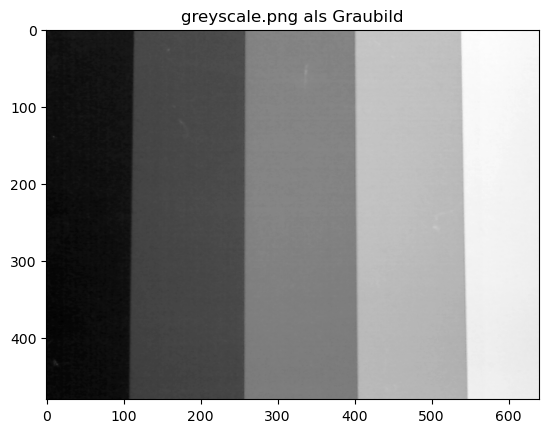

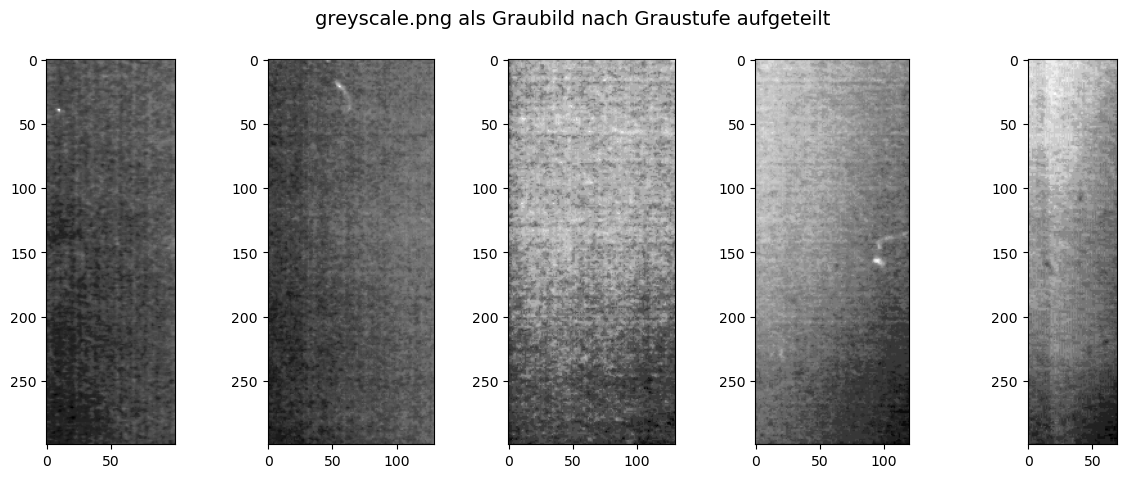

<Figure size 800x400 with 0 Axes>

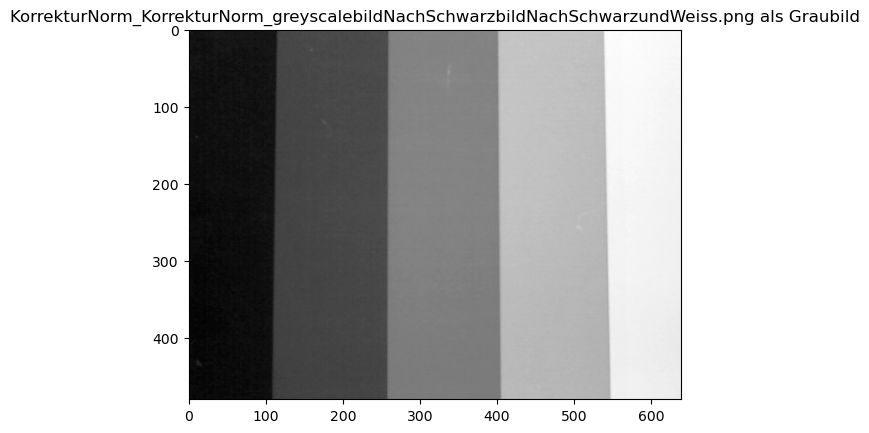

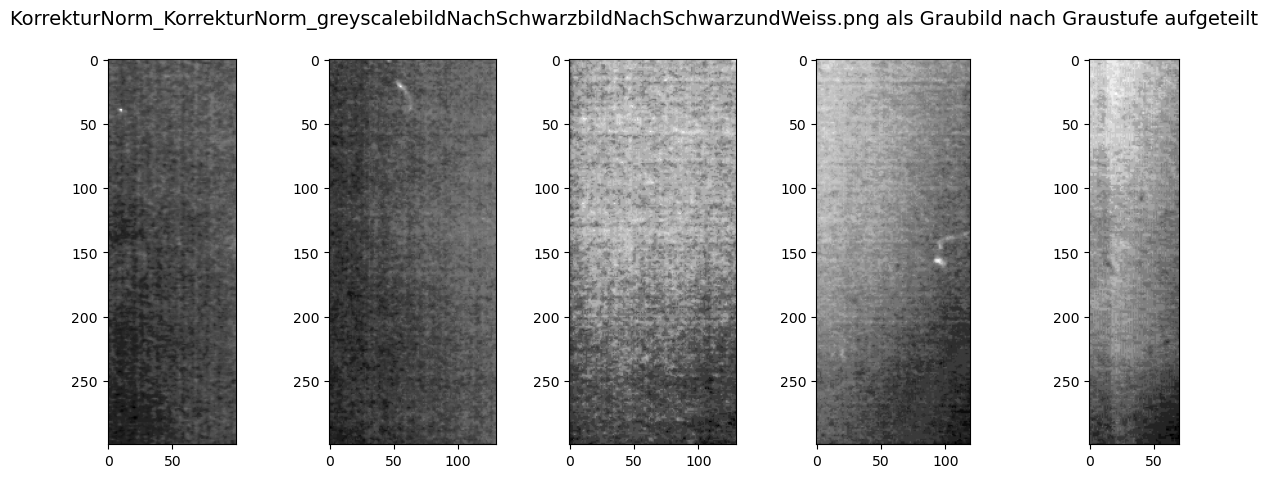

'KorrekturNorm_KorrekturNorm_greyscalebildNachSchwarzbildNachSchwarzundWeiss.png'

In [1686]:
korrigierGrayscale(1)

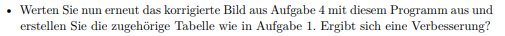

In [1687]:

def tabelle2():
    
    dateiname = korrigierGrayscale(1)
    ausschnittBildArr = einBildEinlesen(dateiname=dateiname,Farbe =0,keinUrBild=1,asSubplot=1,keinTeilBild = 1)
    gesamtMean, gesamtStd,pixelMeanArray, pixelStdArray,erhaltenesPixelArr = proStufeMittStd(ausschnittBildArr, plotEachAusschnitt =0, plotGesamtStreuung= 1)
    print("Neue Tabelle: ")
    tabelle = tabelleGraustufen(pixelMeanArray, pixelStdArray,save_csv=True, csv_name="graustufenTabelle_A2.csv")
    #originaltabelle
    print("\n\nOriginaltabelle: ")
    ausschnittBildArr = einBildEinlesen(r"greyscale.png",Farbe =0,keinUrBild=1,asSubplot=1,keinTeilBild = 1)
    gesamtMean, gesamtStd,pixelMeanArray, pixelStdArray,erhaltenesPixelArr = proStufeMittStd(ausschnittBildArr, plotEachAusschnitt =0, plotGesamtStreuung= 0)
    tabelle = tabelleGraustufen(pixelMeanArray, pixelStdArray,save_csv=True, csv_name="graustufenTabelle_A1.csv")
    

245.91652083333338


<Figure size 800x400 with 0 Axes>

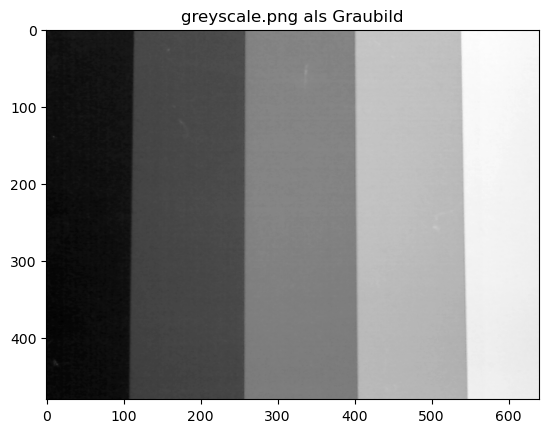

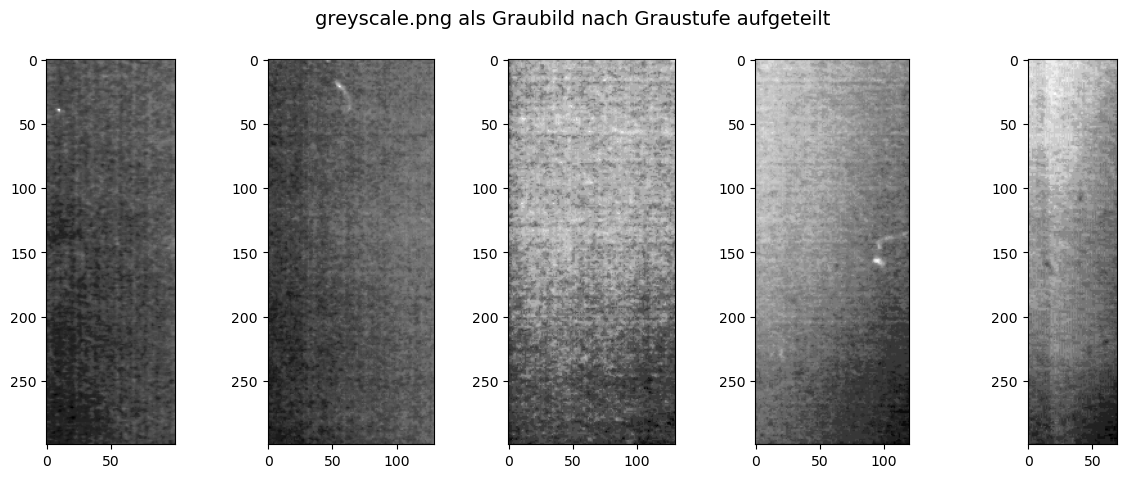

<Figure size 800x400 with 0 Axes>

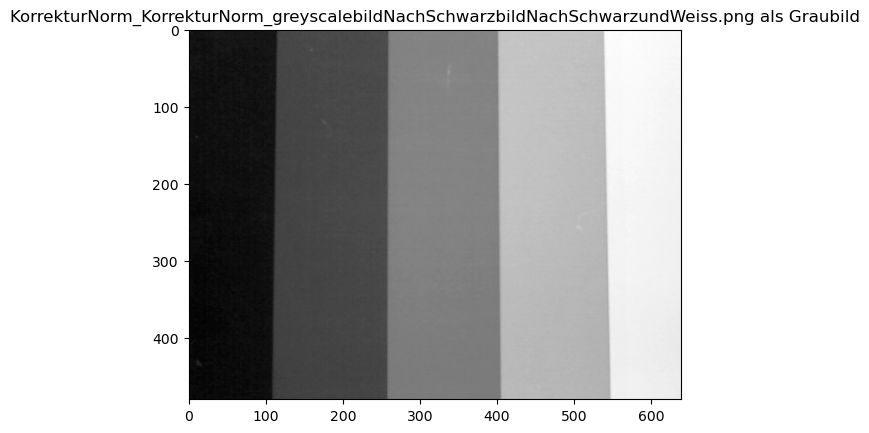

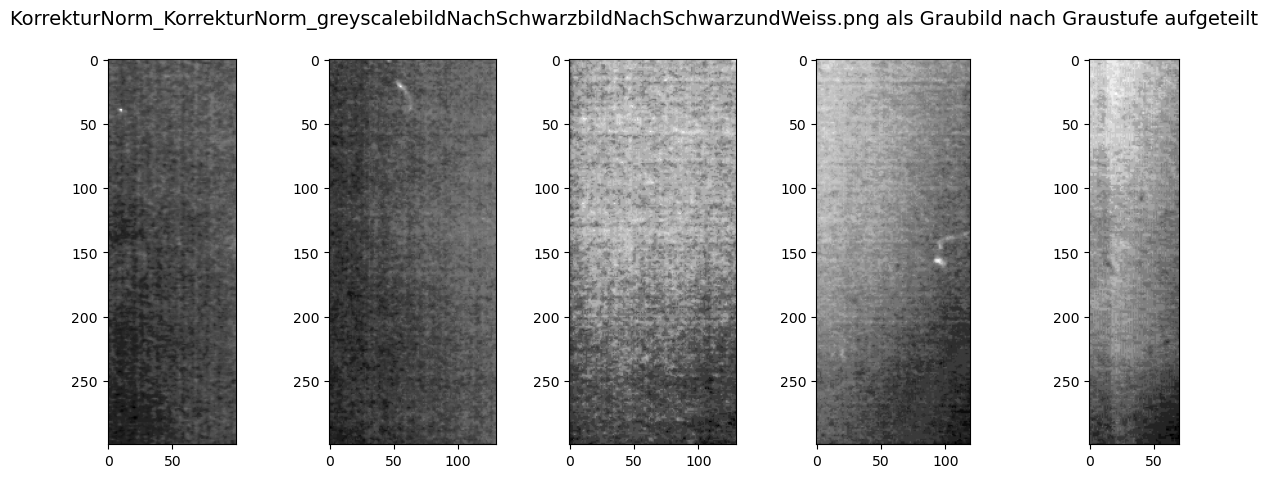

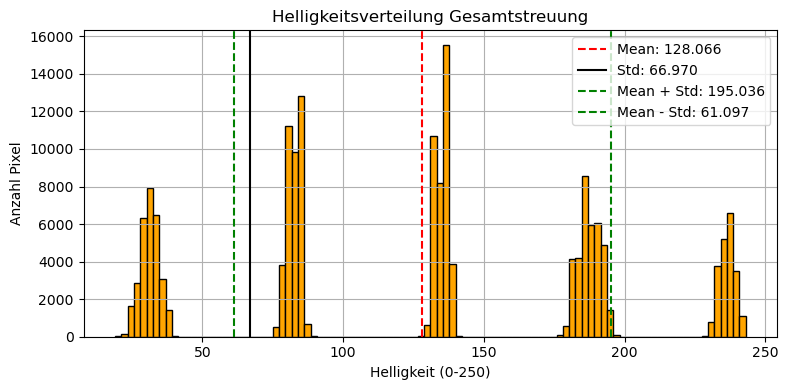

Neue Tabelle: 

===================== Tabelle Graustufen =====================
Grauwert-Stufe  Mittelwert  Standardabweichung
       schwarz      31.286               3.316
    dunkelgrau      82.353               2.362
          grau     134.957               2.298
      hellgrau     187.500               3.821
         weiss     236.536               2.585

>>> Tabelle gespeichert als: graustufenTabelle_A2.csv


Originaltabelle: 

===================== Tabelle Graustufen =====================
Grauwert-Stufe  Mittelwert  Standardabweichung
       schwarz      31.316               3.353
    dunkelgrau      83.263               2.493
          grau     135.957               2.298
      hellgrau     188.413               3.968
         weiss     236.856               2.906

>>> Tabelle gespeichert als: graustufenTabelle_A1.csv


In [1688]:
tabelle2()

die Standardabweichungen der einzelnen Grautöne sind weniger geworden => Verbesserung